In [27]:
%pip install –pre –extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '–pre'


In [105]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [106]:
df = pd.read_csv('./chips.csv')
df.head()

,x,y,class
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


# Decision Tree

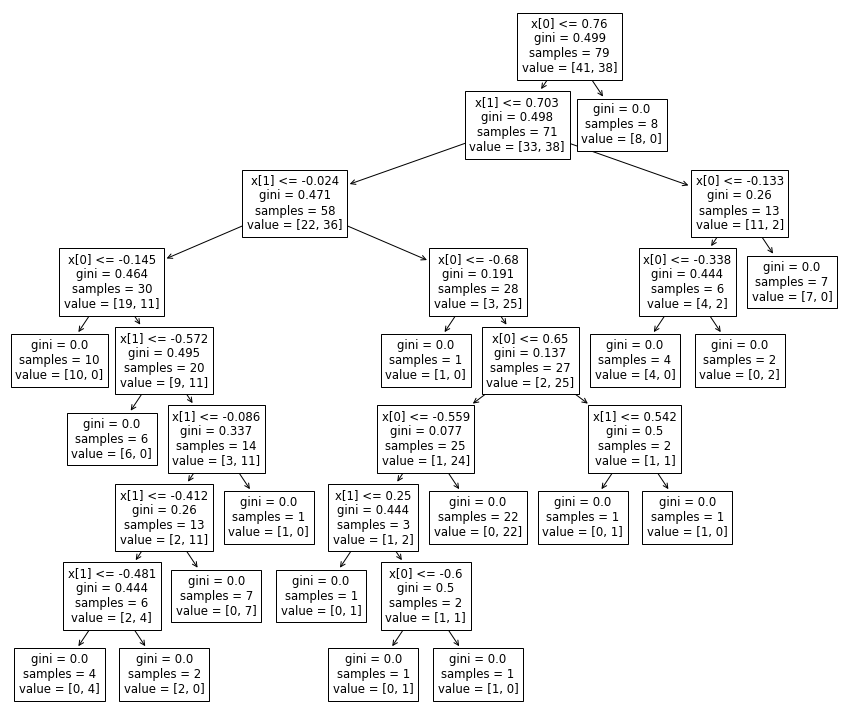

In [107]:
x = df[['x', 'y']]
y = df[['class']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
plt.figure(figsize=(15,13))
plot_tree(dt)
plt.show()

In [108]:
def get_scores(data_x, data_y, n):
    ans = []
    for i in range(1, n + 1):
        dt = DecisionTreeClassifier(max_depth=i, random_state=42)
        dt.fit(x_train, y_train)
        ans.append(dt.score(data_x, data_y))
    return ans

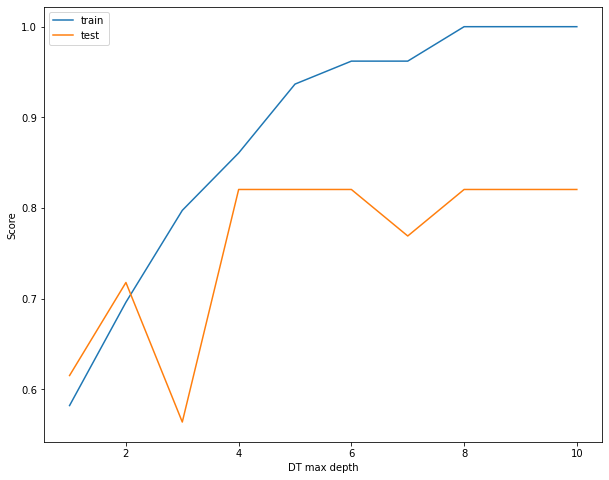

In [109]:
train_scores = get_scores(x_train, y_train, 10)
test_scores = get_scores(x_test, y_test, 10)

plt.figure(figsize=(10,8))
plt.plot(range(1, 11), train_scores, label='train')
plt.plot(range(1, 11), test_scores, label='test')
plt.legend(loc='best')
plt.xlabel('DT max depth')
plt.ylabel('Score')
plt.show()

# Random Forest

In [110]:
def get_forest_scores(data_x, data_y):
    ans = []
    for i in range(1, 250, 10):
        forest = RandomForestClassifier(n_estimators=i, random_state=42)
        forest.fit(x_train, np.ravel(y_train))
        ans.append(forest.score(data_x, np.ravel(data_y)))
    return ans

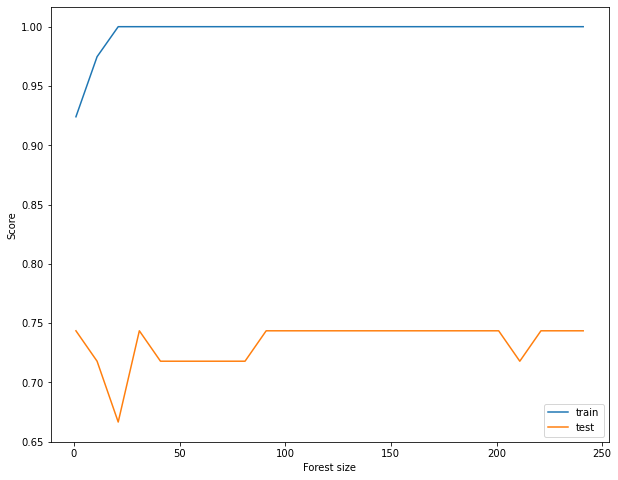

In [111]:
train_scores = get_forest_scores(x_train, y_train)
test_scores = get_forest_scores(x_test, y_test)

plt.figure(figsize=(10,8))
plt.plot(range(1, 250, 10), train_scores, label='train')
plt.plot(range(1, 250, 10), test_scores, label='test')
plt.legend(loc='best')
plt.xlabel('Forest size')
plt.ylabel('Score')
plt.show()

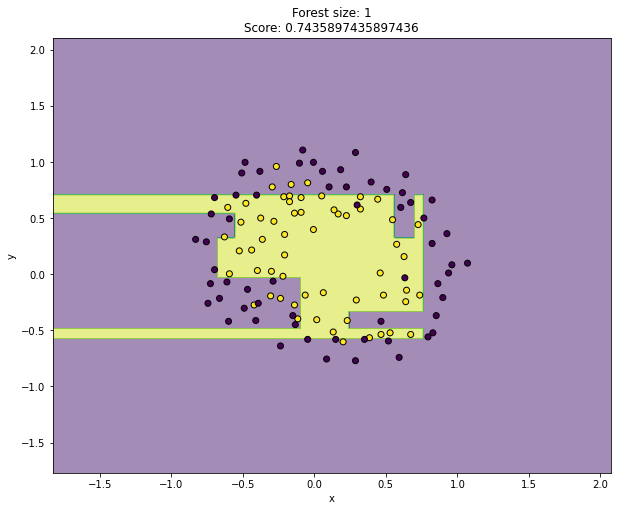

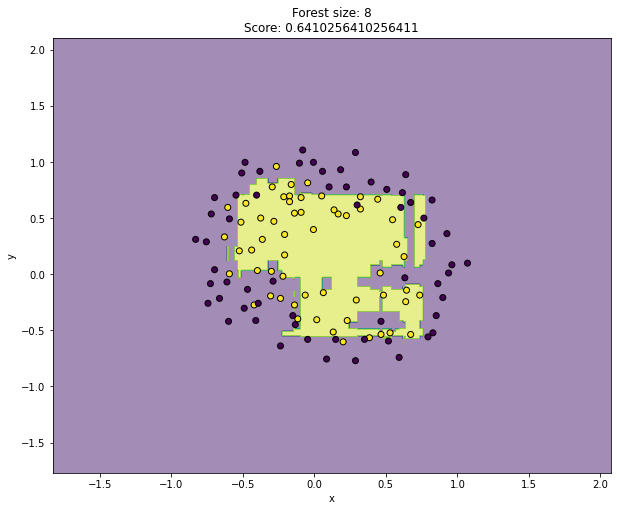

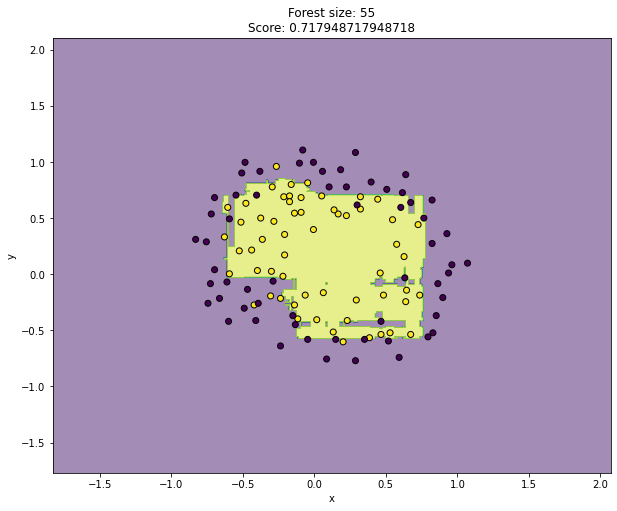

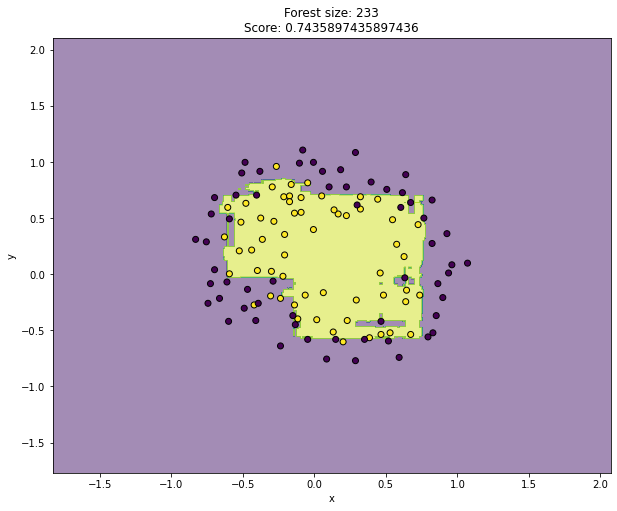

In [112]:
tree_numbers = [1, 8, 55, 233]
for i in tree_numbers:
    forest = RandomForestClassifier(n_estimators=i, random_state=42)
    forest.fit(x_train, np.ravel(y_train))
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = DecisionBoundaryDisplay.from_estimator(forest, df[["x", "y"]], response_method="predict", grid_resolution=1000, alpha=0.5, ax=ax)
    disp.ax_.scatter(df.x, df.y, c=df["class"], edgecolor="k")
    plt.title(f"Forest size: {i}\nScore: {forest.score(x_test, y_test)}")
    plt.show()

# Ada Boost

In [113]:
def get_ada_scores(data_x, data_y):
    ans = []
    for i in range(1, 250, 10):
        ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=i, random_state=42)
        ada.fit(x_train, np.ravel(y_train))
        ans.append(ada.score(data_x, np.ravel(data_y)))
    return ans

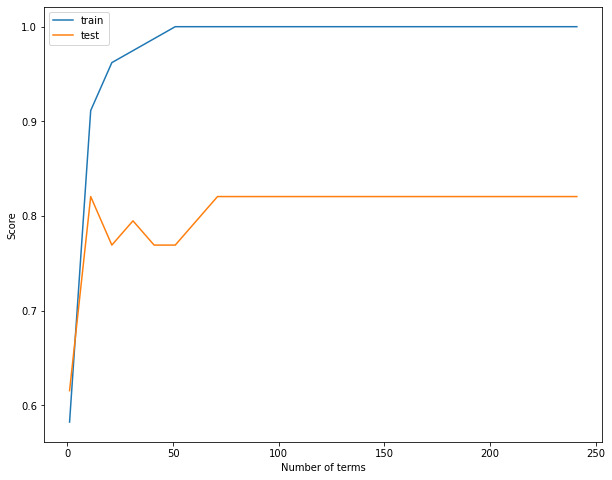

In [114]:
train_scores = get_ada_scores(x_train, y_train)
test_scores = get_ada_scores(x_test, y_test)

plt.figure(figsize=(10,8))
plt.plot(range(1, 250, 10), train_scores, label='train')
plt.plot(range(1, 250, 10), test_scores, label='test')
plt.legend(loc='best')
plt.xlabel('Number of terms')
plt.ylabel('Score')
plt.show()

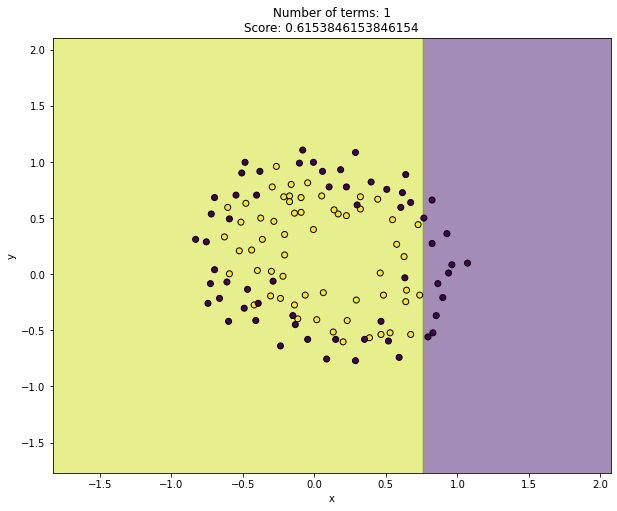

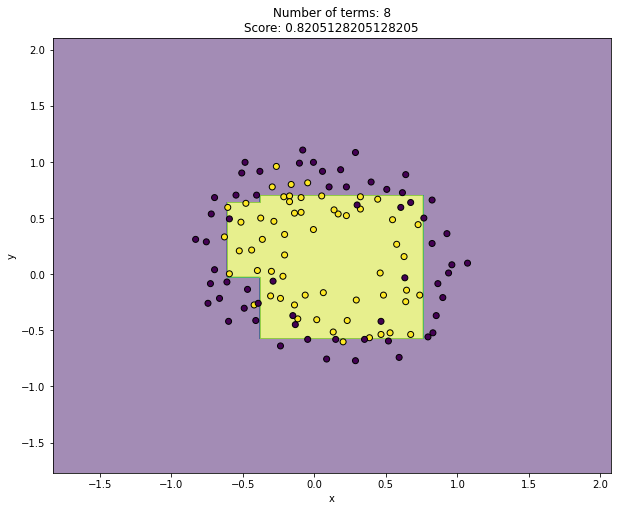

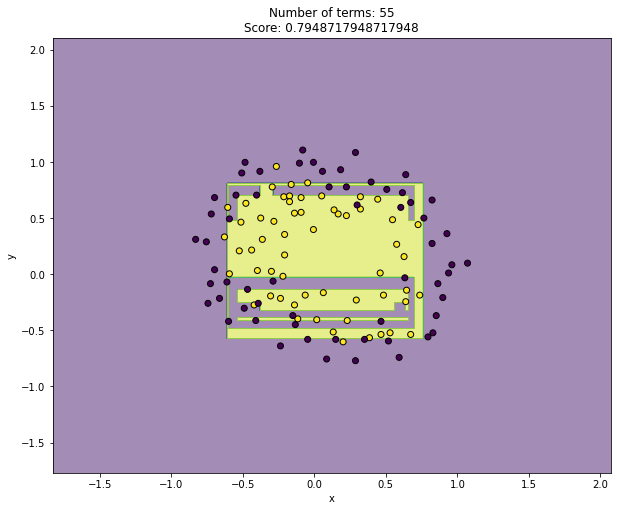

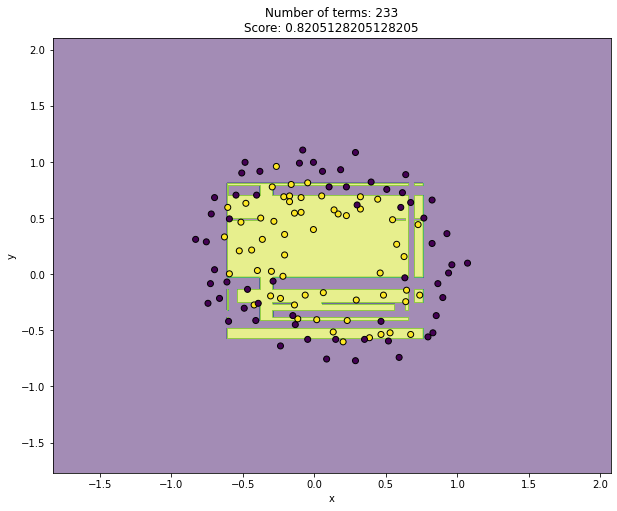

In [115]:
for i in tree_numbers:
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=i, random_state=42)
    ada.fit(x_train, np.ravel(y_train))
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = DecisionBoundaryDisplay.from_estimator(ada, df[["x", "y"]], response_method="predict", grid_resolution=1000, alpha=0.5, ax=ax)
    disp.ax_.scatter(df.x, df.y, c=df["class"], edgecolor="k")
    plt.title(f"Number of terms: {i}\nScore: {ada.score(x_test, y_test)}")
    plt.show()